In [8]:
# Necessary imports for this notebook
import os

import numpy as np
import pandas as pd

import datetime
import time

import random

# For plotting
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

In [9]:
def gerador_perfil_cliente_table(n_customers, random_state=0):
    
    np.random.seed(random_state)
        
    cliente_ID_properties=[]
    
    # Generate customer properties from random distributions 
    for cliente_ID in range(n_customers):
        
        x_cliente_ID = np.random.uniform(0,100)
        y_cliente_ID = np.random.uniform(0,100)
        
        media_qtd = np.random.uniform(5,100) # Arbitrary (but sensible) value 
        dp_qtd = media_qtd/2 # Arbitrary (but sensible) value
        
        media_trans_pday = np.random.uniform(0,4) # Arbitrary (but sensible) value 
        
        cliente_ID_properties.append([cliente_ID,
                                      x_cliente_ID, y_cliente_ID,
                                      media_qtd, dp_qtd,
                                      media_trans_pday])
        
    perfil_cliente_table = pd.DataFrame(cliente_ID_properties, columns=['cliente_ID',
                                                                      'x_cliente_ID', 'y_cliente_ID',
                                                                      'media_qtd', 'dp_qtd',
                                                                      'media_trans_pday'])
    
    return perfil_cliente_table

In [10]:
n_customers = 5
perfil_cliente_table = gerador_perfil_cliente_table(n_customers, random_state = 0)
perfil_cliente_table

cliente_ID  x_cliente_ID  y_cliente_ID  media_qtd     dp_qtd  \
0           0     54.881350     71.518937  62.262521  31.131260   
1           1     42.365480     64.589411  46.570785  23.285393   
2           2     96.366276     38.344152  80.213879  40.106939   
3           3     56.804456     92.559664  11.748426   5.874213   
4           4      2.021840     83.261985  78.924891  39.462446   

   media_trans_pday  
0          2.179533  
1          3.567092  
2          2.115580  
3          0.348517  
4          3.480049

In [11]:
def gerador_perfil_terminal_table(n_terminals, random_state=0):
    
    np.random.seed(random_state)
        
    terminal_id_properties=[]
    
    # Gere propriedades de terminal a partir de distribuições aleatórias
    for terminal_ID in range(n_terminals):
        
        x_terminal_id = np.random.uniform(0,100)
        y_terminal_id = np.random.uniform(0,100)
        
        terminal_id_properties.append([terminal_ID,
                                      x_terminal_id, y_terminal_id])
                                       
    perfil_terminal_table = pd.DataFrame(terminal_id_properties, columns=['terminal_ID',
                                                                      'x_terminal_id', 'y_terminal_id'])
    
    return perfil_terminal_table

In [12]:
n_terminais = 5
perfil_terminal_table = gerador_perfil_terminal_table(n_terminais, random_state = 0)
perfil_terminal_table

terminal_ID  x_terminal_id  y_terminal_id
0            0      54.881350      71.518937
1            1      60.276338      54.488318
2            2      42.365480      64.589411
3            3      43.758721      89.177300
4            4      96.366276      38.344152

In [13]:
def get_list_terminais_dentro_raio(perfil_cliente, x_y_terminais, r):
    
    # Use matrizes numpy a seguir para acelerar os cálculos
    
    # Localização (x,y) do cliente como matriz numpy
    x_y_cliente = perfil_cliente[['x_cliente_ID','y_cliente_ID']].values.astype(float)
    
    # Diferença quadrada nas coordenadas entre os locais do cliente e do terminal
    squared_diff_x_y = np.square(x_y_cliente - x_y_terminais)
    
    # Somar ao longo das linhas e calcular a raiz suared para obter a distância
    dist_x_y = np.sqrt(np.sum(squared_diff_x_y, axis=1))
    
    # Obtenha os índices dos terminais que estão a uma distância menor que r
    available_terminal = list(np.where(dist_x_y<r)[0])
    
    # Retornar a lista de IDs de terminal
    return available_terminal

In [14]:
# Primeiro, obtemos as localizações geográficas de todos os terminais como uma matriz numpy
x_y_terminais = perfil_terminal_table[['x_terminal_id','y_terminal_id']].values.astype(float)
# E obtenha a lista de terminais dentro do raio de $ 50 $ para o último cliente
get_list_terminais_dentro_raio(perfil_cliente_table.iloc[4], x_y_terminais=x_y_terminais, r=50)

[2, 3]

In [15]:
perfil_terminal_table

terminal_ID  x_terminal_id  y_terminal_id
0            0      54.881350      71.518937
1            1      60.276338      54.488318
2            2      42.365480      64.589411
3            3      43.758721      89.177300
4            4      96.366276      38.344152

In [16]:
%%capture

terminals_available_to_customer_fig, ax = plt.subplots(figsize=(5,5))

# Plot locations of terminals
ax.scatter(perfil_terminal_table.x_terminal_id.values, 
           perfil_terminal_table.y_terminal_id.values, 
           color='blue', label = 'Localização dos terminais')

# Plot location of the last customer
customer_id=4
ax.scatter(perfil_cliente_table.iloc[customer_id].x_cliente_ID, 
           perfil_cliente_table.iloc[customer_id].y_cliente_ID, 
           color='red',label="Localização do último cliente")

ax.legend(loc = 'upper left', bbox_to_anchor=(1.05, 1))

# Plot the region within a radius of 50 of the last customer
circ = plt.Circle((perfil_cliente_table.iloc[customer_id].x_cliente_ID,
                   perfil_cliente_table.iloc[customer_id].y_cliente_ID), radius=50, color='g', alpha=0.2)
ax.add_patch(circ)

fontsize=15

ax.set_title("Círculo verde: \n Terminais em um raio de 50 \n do último cliente")
ax.set_xlim([0, 100])
ax.set_ylim([0, 100])
    
ax.set_xlabel('x_terminal_id', fontsize=fontsize)
ax.set_ylabel('y_terminal_id', fontsize=fontsize)

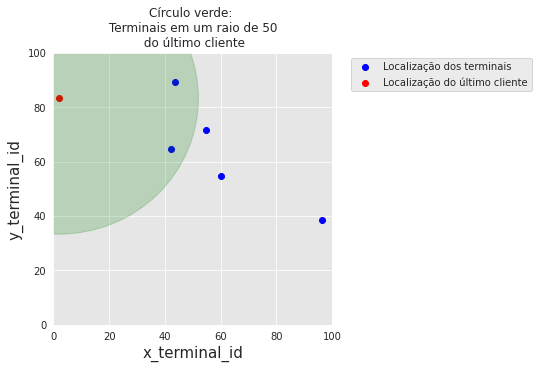

In [17]:
terminals_available_to_customer_fig

In [18]:
perfil_cliente_table['available_terminal']=perfil_cliente_table.apply(lambda x : get_list_terminais_dentro_raio(x, x_y_terminais=x_y_terminais, r=50), axis=1)
perfil_cliente_table

cliente_ID  x_cliente_ID  y_cliente_ID  media_qtd     dp_qtd  \
0           0     54.881350     71.518937  62.262521  31.131260   
1           1     42.365480     64.589411  46.570785  23.285393   
2           2     96.366276     38.344152  80.213879  40.106939   
3           3     56.804456     92.559664  11.748426   5.874213   
4           4      2.021840     83.261985  78.924891  39.462446   

   media_trans_pday available_terminal  
0          2.179533       [0, 1, 2, 3]  
1          3.567092       [0, 1, 2, 3]  
2          2.115580             [1, 4]  
3          0.348517       [0, 1, 2, 3]  
4          3.480049             [2, 3]

In [61]:

def gerador_transacoes_table(perfil_cliente, start_date = "2022-01-01", nb_days = 10):
    
    customer_transactions = []
    
    random.seed(int(perfil_cliente.cliente_ID))
    np.random.seed(int(perfil_cliente.cliente_ID))
    
    # For all days
    for day in range(nb_days):
        
        # Random number of transactions for that day 
        nb_TS = np.random.poisson(perfil_cliente.media_trans_pday)
        
        # If nb_TS positive, let us generate transactions
        if nb_TS>0:
            
            for TS in range(nb_TS):
                
                # Time of transaction: Around noon, std 20000 seconds. This choice aims at simulating the fact that 
                # most transactions occur during the day.
                time_TS = int(np.random.normal(86400/2, 20000))
                
                # If transaction time between 0 and 86400, let us keep it, otherwise, let us discard it
                if (time_TS>0) and (time_TS<86400):
                    
                    # Amount is drawn from a normal distribution  
                    amount = np.random.normal(perfil_cliente.media_qtd, perfil_cliente.dp_qtd)
                    
                    # If amount negative, draw from a uniform distribution
                    if amount<0:
                        amount = np.random.uniform(0,perfil_cliente.media_qtd*2)
                    
                    amount=np.round(amount,decimals=2)
                    
                    if len(perfil_cliente.available_terminal)>0:
                        
                        terminal_id = random.choice(perfil_cliente.available_terminal)
                    
                        customer_transactions.append([time_TS+day*86400, day,
                                                      perfil_cliente.cliente_ID, 
                                                      terminal_id, amount])
            
    customer_transactions = pd.DataFrame(customer_transactions, columns=['TS_segundos', 'TS_dias', 'cliente_ID', 'terminal_ID', 'TS_qtd'])
    
    if len(customer_transactions)>0:
        customer_transactions['TS_date'] = pd.to_datetime(customer_transactions["TS_segundos"], unit='s', origin=start_date)
        customer_transactions=customer_transactions[['TS_date','cliente_ID', 'terminal_ID', 'TS_qtd','TS_segundos', 'TS_dias']]
    
    return customer_transactions  


In [62]:
transaction_table_customer_0=gerador_transacoes_table(perfil_cliente_table.iloc[0], 
                                                         start_date = "2022-01-01", 
                                                         nb_days = 5)
transaction_table_customer_0

TS_date  cliente_ID  terminal_ID  TS_qtd  TS_segundos  TS_dias
0  2022-01-01 07:19:05           0            3  123.59        26345        0
1  2022-01-01 19:02:02           0            3   46.51        68522        0
2  2022-01-01 18:00:16           0            0   77.34        64816        0
3  2022-01-02 15:13:02           0            2   32.35       141182        1
4  2022-01-02 14:05:38           0            3   63.30       137138        1
5  2022-01-02 15:46:51           0            3   13.59       143211        1
6  2022-01-02 08:51:06           0            2   54.72       118266        1
7  2022-01-02 20:24:47           0            3   51.89       159887        1
8  2022-01-03 12:15:47           0            2  117.91       216947        2
9  2022-01-03 08:50:09           0            1   67.72       204609        2
10 2022-01-03 09:25:49           0            1   28.46       206749        2
11 2022-01-03 15:33:14           0            2   50.25       228794        2
12 2022-01-03 07:41:24           0            1   93.26       200484        2
13 2022-01-04 01:15:35           0            0   46.40       263735        3
14 2022-01-04 09:33:58           0            2   23.26       293638        3
15 2022-01-05 16:19:09           0            1   71.96       404349        4
16 2022-01-05 07:41:19           0            2   52.69       373279        4

In [63]:
transactions_df=perfil_cliente_table.groupby('cliente_ID').apply(lambda x : gerador_transacoes_table(x.iloc[0], nb_days=5)).reset_index(drop=True)
transactions_df

TS_date  cliente_ID  terminal_ID  TS_qtd  TS_segundos  TS_dias
0  2022-01-01 07:19:05           0            3  123.59        26345        0
1  2022-01-01 19:02:02           0            3   46.51        68522        0
2  2022-01-01 18:00:16           0            0   77.34        64816        0
3  2022-01-02 15:13:02           0            2   32.35       141182        1
4  2022-01-02 14:05:38           0            3   63.30       137138        1
..                 ...         ...          ...     ...          ...      ...
60 2022-01-05 07:41:19           4            2  111.38       373279        4
61 2022-01-05 06:59:59           4            3   80.36       370799        4
62 2022-01-05 17:23:34           4            2   53.25       408214        4
63 2022-01-05 12:51:38           4            2   36.44       391898        4
64 2022-01-05 12:38:46           4            3   17.53       391126        4

[65 rows x 6 columns]

In [64]:
def generate_dataset(n_customers = 10000, n_terminals = 1000000, nb_days=90, start_date="2018-04-01", r=5):
    
    start_time=time.time()
    perfil_cliente_table = gerador_perfil_cliente_table(n_customers, random_state = 0)
    print("Time to generate customer profiles table: {0:.2}s".format(time.time()-start_time))
    
    start_time=time.time()
    perfil_terminal_table = gerador_perfil_terminal_table(n_terminals, random_state = 1)
    print("Time to generate terminal profiles table: {0:.2}s".format(time.time()-start_time))
    
    start_time=time.time()
    x_y_terminais = perfil_terminal_table[['x_terminal_id','y_terminal_id']].values.astype(float)
    perfil_cliente_table['available_terminal'] = perfil_cliente_table.apply(lambda x : get_list_terminais_dentro_raio(x, x_y_terminais=x_y_terminais, r=r), axis=1)
    # With Pandarallel
    #customer_profiles_table['available_terminals'] = customer_profiles_table.parallel_apply(lambda x : get_list_closest_terminals(x, x_y_terminals=x_y_terminals, r=r), axis=1)
    perfil_cliente_table['nb_terminals']=perfil_cliente_table.available_terminal.apply(len)
    print("Time to associate terminals to customers: {0:.2}s".format(time.time()-start_time))
    
    start_time=time.time()
    transactions_df=perfil_cliente_table.groupby('cliente_ID').apply(lambda x : gerador_transacoes_table(x.iloc[0], nb_days=nb_days)).reset_index(drop=True)
    # With Pandarallel
    #transactions_df=customer_profiles_table.groupby('CUSTOMER_ID').parallel_apply(lambda x : generate_transactions_table(x.iloc[0], nb_days=nb_days)).reset_index(drop=True)
    print("Time to generate transactions: {0:.2}s".format(time.time()-start_time))
    
    # Sort transactions chronologically
    transactions_df=transactions_df.sort_values('TS_date')
    # Reset indices, starting from 0
    transactions_df.reset_index(inplace=True,drop=True)
    transactions_df.reset_index(inplace=True)
    # TRANSACTION_ID are the dataframe indices, starting from 0
    transactions_df.rename(columns = {'index':'TRANSACTION_ID'}, inplace = True)
    
    return (perfil_cliente_table, perfil_terminal_table, transactions_df)

In [65]:
(perfil_clientes_table, terminal_profiles_table, transactions_df)=\
    generate_dataset(n_customers = 5000, 
                     n_terminals = 10000, 
                     nb_days=183, 
                     start_date="2022-01-01", 
                     r=5)

Time to generate customer profiles table: 0.067s
Time to generate terminal profiles table: 0.064s
Time to associate terminals to customers: 2.9s
Time to generate transactions: 1.3e+02s


In [66]:
transactions_df.shape

(1754155, 7)

In [67]:
transactions_df

TRANSACTION_ID             TS_date cliente_ID terminal_ID  TS_qtd  \
0                     0 2022-01-01 00:00:31        596        3156   57.16   
1                     1 2022-01-01 00:02:10       4961        3412   81.51   
2                     2 2022-01-01 00:07:56          2        1365  146.00   
3                     3 2022-01-01 00:09:29       4128        8737   64.49   
4                     4 2022-01-01 00:10:34        927        9906   50.99   
...                 ...                 ...        ...         ...     ...   
1754150         1754150 2022-07-02 23:56:36        161         655   54.24   
1754151         1754151 2022-07-02 23:57:38       4342        6181    1.23   
1754152         1754152 2022-07-02 23:58:21        618        1502    6.62   
1754153         1754153 2022-07-02 23:59:52       4056        3067   55.40   
1754154         1754154 2022-07-02 23:59:57       3542        9849   23.59   

        TS_segundos TS_dias  
0                31       0  
1               130       0  
2               476       0  
3               569       0  
4               634       0  
...             ...     ...  
1754150    15810996     182  
1754151    15811058     182  
1754152    15811101     182  
1754153    15811192     182  
1754154    15811197     182  

[1754155 rows x 7 columns]

In [75]:
%%capture

distribution_amount_times_fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = transactions_df[transactions_df.TS_dias<10]['TS_qtd'].sample(n=10000).values
time_val = transactions_df[transactions_df.TS_dias<10]['TS_segundos'].sample(n=10000).values

sns.distplot(amount_val, ax=ax[0], color='r', hist = True, kde = False)
ax[0].set_title('Distribuição de valores de transacoes', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])
ax[0].set(xlabel = "Qtd", ylabel="Numero de Transacoes")

# We divide the time variables by 86400 to transform seconds to days in the plot
sns.distplot(time_val/86400, ax=ax[1], color='b', bins = 100, hist = True, kde = False)
ax[1].set_title('Distribuicao de transacao por hora', fontsize=14)
ax[1].set_xlim([min(time_val/86400), max(time_val/86400)])
ax[1].set_xticks(range(10))
ax[1].set(xlabel = "Horas (dias)", ylabel="Numero de Transacoes")

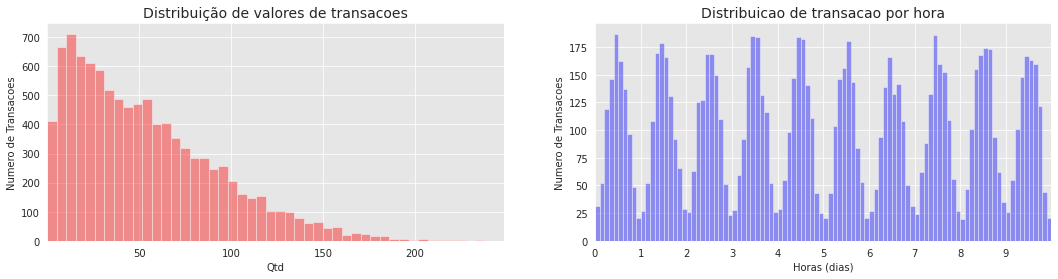

In [76]:
distribution_amount_times_fig

In [86]:
def add_frauds(customer_profiles_table, terminal_profiles_table, transactions_df):
    
    # By default, all transactions are genuine
    transactions_df['TS_Fraude']=0
    transactions_df['TS_Cenario_fraude']=0
    
    # Scenario 1
    transactions_df.loc[transactions_df.TS_qtd>220, 'TS_Fraude']=1
    transactions_df.loc[transactions_df.TS_qtd>220, 'TS_Cenario_fraude']=1
    nb_frauds_scenario_1=transactions_df.TS_Fraude.sum()
    print("Número de fraudes do cenário 1: "+str(nb_frauds_scenario_1))
    
    # Scenario 2
    for day in range(transactions_df.TS_dias.max()):
        
        compromised_terminals = perfil_terminal_table.terminal_ID.sample(n=2, random_state=day)
        
        compromised_transactions=transactions_df[(transactions_df.TS_dias>=day) & 
                                                    (transactions_df.TS_dias<day+28) & 
                                                    (transactions_df.terminal_ID.isin(compromised_terminals))]
                            
        transactions_df.loc[compromised_transactions.index,'TS_Fraude']=1
        transactions_df.loc[compromised_transactions.index,'TS_Cenario_fraude']=2
    
    nb_frauds_scenario_2=transactions_df.TS_Fraude.sum()-nb_frauds_scenario_1
    print("Número de fraudes do cenário 2: "+str(nb_frauds_scenario_2))
    
    # Scenario 3
    for day in range(transactions_df.TS_dias.max()):
        
        compromised_customers = perfil_cliente_table.cliente_ID.sample(n=3, random_state=day).values
        
        compromised_transactions=transactions_df[(transactions_df.TS_dias>=day) & 
                                                    (transactions_df.TS_dias<day+14) & 
                                                    (transactions_df.cliente_ID.isin(compromised_customers))]
        
        nb_compromised_transactions=len(compromised_transactions)
        
        
        random.seed(day)
        index_fauds = random.sample(list(compromised_transactions.index.values),k=int(nb_compromised_transactions/3))
        
        transactions_df.loc[index_fauds,'TS_qtd']=transactions_df.loc[index_fauds,'TS_qtd']*5
        transactions_df.loc[index_fauds,'TS_Fraude']=1
        transactions_df.loc[index_fauds,'TS_Cenario_fraude']=3
        
                             
    nb_frauds_scenario_3=transactions_df.TS_Fraude.sum()-nb_frauds_scenario_2-nb_frauds_scenario_1
    print("Número de fraudes do cenário 3: "+str(nb_frauds_scenario_3))
    
    return transactions_df     

In [87]:
%time transactions_df = add_frauds(perfil_cliente_table, perfil_terminal_table, transactions_df)

Número de fraudes do cenário 1: 978
Número de fraudes do cenário 2: 828
Número de fraudes do cenário 3: 1948
CPU times: user 2min 4s, sys: 642 ms, total: 2min 4s
Wall time: 2min 4s


In [88]:
transactions_df.TS_Fraude.mean()

0.0021400617391279563

In [89]:
transactions_df.TS_Fraude.sum()

3754

In [90]:
transactions_df.head()

TRANSACTION_ID             TS_date cliente_ID terminal_ID  TS_qtd  \
0               0 2022-01-01 00:00:31        596        3156   57.16   
1               1 2022-01-01 00:02:10       4961        3412   81.51   
2               2 2022-01-01 00:07:56          2        1365  146.00   
3               3 2022-01-01 00:09:29       4128        8737   64.49   
4               4 2022-01-01 00:10:34        927        9906   50.99   

  TS_segundos TS_dias  TS_Fraude  TS_Cenario_fraude  
0          31       0          0                  0  
1         130       0          0                  0  
2         476       0          0                  0  
3         569       0          0                  0  
4         634       0          0                  0

In [91]:
transactions_df[transactions_df.TS_Cenario_fraude==1].shape

(978, 9)

In [92]:
transactions_df[transactions_df.TS_Cenario_fraude==2].shape

(828, 9)

In [93]:
transactions_df[transactions_df.TS_Cenario_fraude==3].shape

(1948, 9)

In [95]:
def get_stats(transactions_df):
    #Number of transactions per day
    nb_tx_per_day=transactions_df.groupby(['TS_dias'])['cliente_ID'].count()
    #Number of fraudulent transactions per day
    nb_fraud_per_day=transactions_df.groupby(['TS_dias'])['TS_Fraude'].sum()
    #Number of fraudulent cards per day
    nb_fraudcard_per_day=transactions_df[transactions_df['TS_Fraude']>0].groupby(['TS_dias']).cliente_ID.nunique()
    
    return (nb_tx_per_day,nb_fraud_per_day,nb_fraudcard_per_day)

(nb_tx_per_day,nb_fraud_per_day,nb_fraudcard_per_day)=get_stats(transactions_df)

n_days=len(nb_tx_per_day)
tx_stats=pd.DataFrame({"value":pd.concat([nb_tx_per_day/50,nb_fraud_per_day,nb_fraudcard_per_day])})
tx_stats['stat_type']=["nb_tx_per_day"]*n_days+["nb_fraud_per_day"]*n_days+["nb_fraudcard_per_day"]*n_days
tx_stats=tx_stats.reset_index()

In [98]:
%%capture

sns.set(style='darkgrid')
sns.set(font_scale=1.4)

fraud_and_transactions_stats_fig = plt.gcf()

fraud_and_transactions_stats_fig.set_size_inches(15, 8)

sns_plot = sns.lineplot(x="TS_dias", y="value", data=tx_stats, hue="stat_type", hue_order=["nb_tx_per_day","nb_fraud_per_day","nb_fraudcard_per_day"], legend=False)

sns_plot.set_title('Total de transações e número de transações fraudulentas \ne número de cartões comprometidos por dia', fontsize=20)
sns_plot.set(xlabel = "Número de dias desde o início da geração de dados", ylabel="Quantidade")

sns_plot.set_ylim([0,300])

labels_legend = ["# transações por dia (/50)", "# transações fraudulentas por dia", "# cartões fraudulentos por dia"]

sns_plot.legend(loc='upper left', labels=labels_legend,bbox_to_anchor=(1.05, 1), fontsize=15)

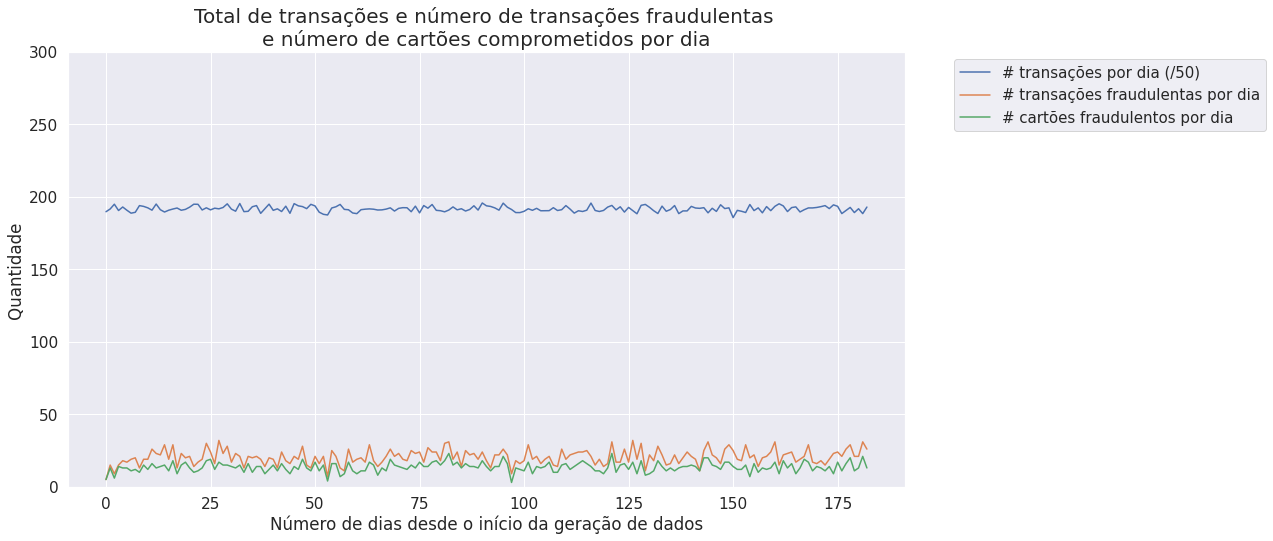

In [99]:
fraud_and_transactions_stats_fig